# Runge-Kutta method
```{index} Runge-Kutta method
```
[Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK4) is most commonly used method for integrating {ref}`Ordinary Differential Equations (ODEs) <ode_linear>`. This method takes into account slope at the beginning, middle (twice) and the end of interval to integrate an ODE with a 4th order accuracy.

## 1st order ODE integration

Consider a continuous function $f(x,y)$, where $x$ is the independent variable and $y$ is the dependent variable -

$$\frac{dy}{dx}=f(x,y)\text{.}$$

Our aim is to find $y(x)$ and to achieve that, we need to:
* know the value of $y=y_0$ at some initial value of $x=x_0$
* step forward from the initial point using finite steps of size $\Delta x$
* know how much $y$ changes for each step in $x$

In RK4 method, the independent variable is incremented in steps and the new value for the dependent variable is calculated at the end of each step according to -

$$y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)\text{,}$$

$$x_{i+1} = x_i + \Delta x,$$

where $\Delta x$ is the increment, $k_1, k_2, k_3$ and $k_4$ are slopes calculated as follows -

$$k_1 = \Delta x f(x_i, y_i),\\\\\\
k_2 = \Delta x f(x_i + 0.5 \Delta x, y_i + 0.5 k_1),\\\\\\
k_3 = \Delta x f(x_i + 0.5 \Delta x, y_i + 0.5 k_2).\\\\\\
k_4 = \Delta x f(x_i + \Delta x, y_i + k_3).$$

In this notebook, we will learn how to integrate ODEs with this method.

At first, let's create a `RungeKutta` function that will calculate slopes and return $x$ and $y$ at new step.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})

In [2]:
def RungeKutta(x, y, dx, dydx):
    
    # Calculate slopes
    k1 = dx*dydx(x, y)
    k2 = dx*dydx(x+dx/2., y+k1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2.)
    k4 = dx*dydx(x+dx, y+k3)
    
    # Calculate new x and y
    y = y + 1./6*(k1+2*k2+2*k3+k4)
    x = x + dx
    
    return x, y

Analytical solution to the ODE

$$f(x,y)=\frac{dy}{dx}=x^2,$$

with initial values $x_0 = 1$ and $y_0=1$ is

$$y(x)=\frac{x^3}{3}+\frac{2}{3}.$$

Let's solve this equation numerically with RK4 method, with increment $\Delta x=0.1$ and final position $x_{end}=2.$

At first we will define our function $f(x,y)$ as `dxdy1` and analaytical solution as `y1`:

In [3]:
def dydx1(x, y):
    return x**2

def y1(x):
    return x**3/3.+2/3.

Now we need to set up initial values in the problem - starting positions $x_0$ and $y_0$, as well as the increment and ending position:

In [4]:
x0 = 1.
y0 = 1.
dx = 0.1
x_end = 2.

To find a solution with RK4 method, we will need to loop over $x$ values, increasing them by $\Delta x$ each step until they reach $x_{\text{end}}$. We will also create lists that calculated $x$ and $y$ values will be appended to, so that we can plot them afterwards.

In [5]:
x_rk = [x0]
y_rk = [y0]

y = y0
x = x0

while x <= x_end:
    
    x, y = RungeKutta(x, y, dx, dydx1)

    x_rk.append(x)
    y_rk.append(y)

In [6]:
def Euler(x, y, dx, dydx):
    return x+dx, y+dx*dydx(x, y)

x_eu = [x0]
y_eu = [y0]

y = y0
x = x0

while x <= x_end:
    
    x, y = Euler(x, y, dx, dydx1)

    x_eu.append(x)
    y_eu.append(y)

We can plot results together on one graph:

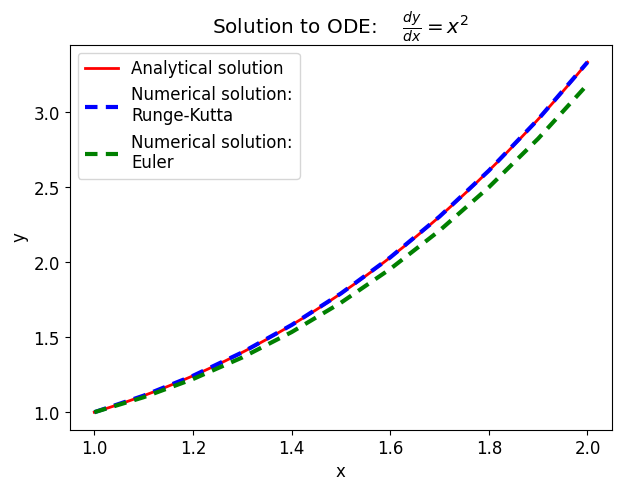

In [7]:
plt.figure(figsize=(7,5))

plt.plot(np.linspace(1,2,50), y1(np.linspace(1,2,50)), 
         label="Analytical solution",color="red", lw=2)

plt.plot(x_rk, y_rk, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",
        lw=3)
plt.plot(x_eu, y_eu, label="Numerical solution:\nEuler", dashes=(3,2), color="green",
        lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=x^2$")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()

As we can see, Runge-Kutta is much more accurate than Euler method. That's the reson why it is more often used when integrating ODEs. In this case Euler method underestimated the analytical solution.

In [8]:
def RungeKutta(x, y, dx, dydx):
    # Calculate slopes
    k1 = dx*dydx(x, y)
    k2 = dx*dydx(x+dx/2., y+k1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2.)
    k4 = dx*dydx(x+dx, y+k3)
    
    # Calculate new x and y
    y = y + 1./6*(k1+2*k2+2*k3+k4)
    x = x + dx
    
    return x, y


def dydx1(x, y, k=0.02):
    return -k*x

def RK4(x0, y0, x_end, dx, dydx1):
    x_rk = [x0]
    y_rk = [y0]

    y = y0
    x = x0

    while x <= x_end:

        x, y = RungeKutta(x, y, dx, dydx1)

        x_rk.append(x)
        y_rk.append(y)
    return x_rk, y_rk

### Exercise: First order reactions

Given a generic first-order reaction mechanism 

$$ A \rightarrow B, $$

model the concentration of the reactants and products ($ [A], [B] $) as a function of time for the interval $[0, 5]$, given the rate constant $k = 0.05 s^{-1}$. 

$$ \frac{d[A]}{dt} = -k[A] $$

Reference: https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Mathematical_Methods_in_Chemistry_(Levitus)/04%3A_First_Order_Ordinary_Differential_Equations/4.03%3A_Chemical_Kinetics

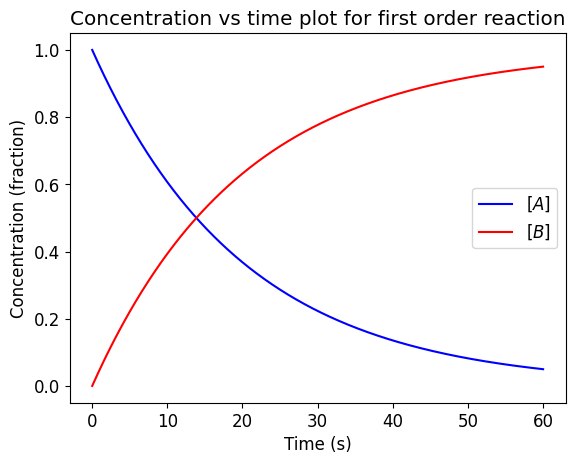

In [9]:
def dy_dx(x, y, k=0.05):
    return -k * y

x0 = 0
y0 = 1
x_end = 60
dx = 0.001

xs, ys = RK4(x0, y0, x_end, dx, dy_dx)
fig = plt.figure()
plt.title("Concentration vs time plot for first order reaction")
plt.plot(xs, ys, 'b-', label=r"$[A]$")
plt.plot(xs, 1-np.array(ys), 'r-', label=r"$[B]$")
plt.xlabel("Time (s)")
plt.ylabel("Concentration (fraction)")
plt.legend()